<a href="https://colab.research.google.com/github/Alejandra451/Regresion-lineal-Colab/blob/main/Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coeficiente de Determinación (R^2): 1.0000


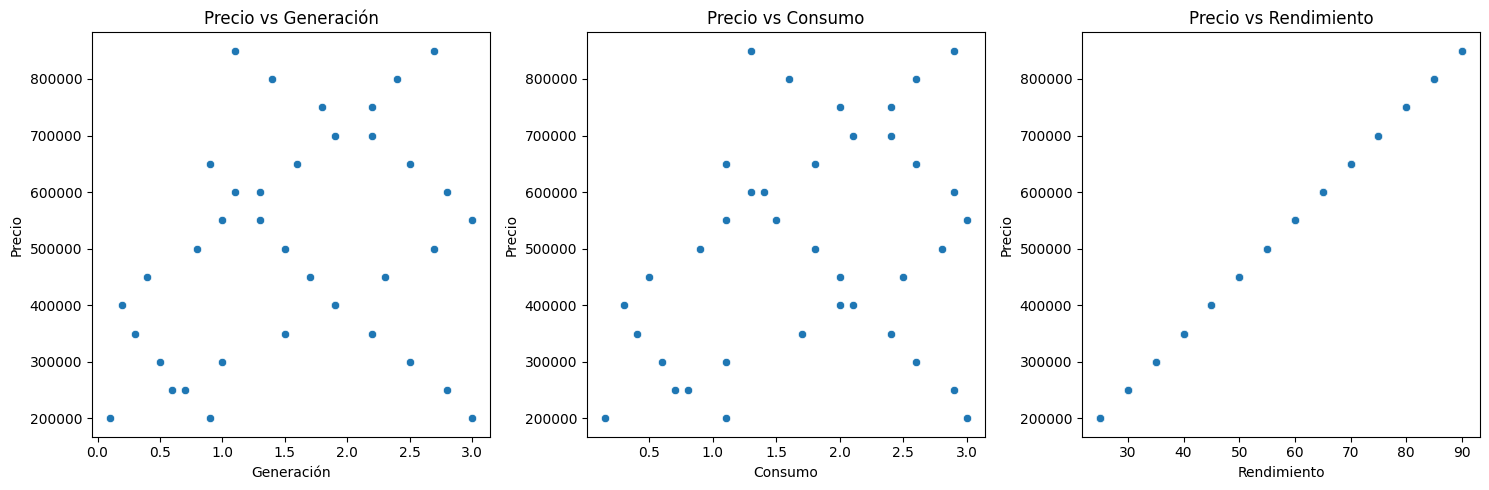

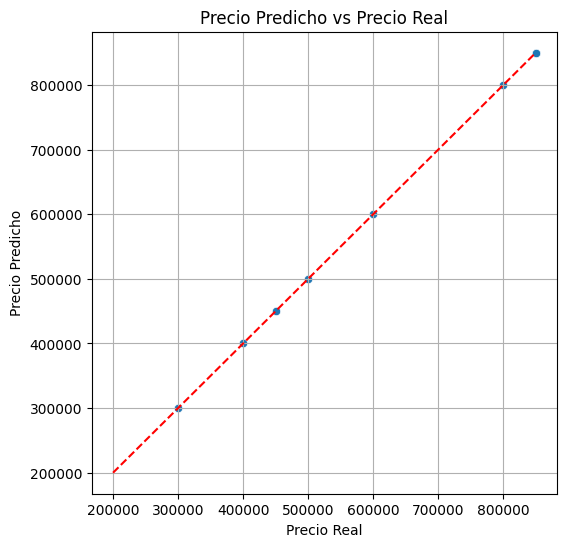

Modelo guardado como 'modelo_regresion_lineal.pkl'


In [4]:

# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

# Cargar datos
file_path = '/content/Datos v2.xlsx'  # Actualiza con la ruta correcta en Colab
data = pd.read_excel(file_path)

# Separar variables independientes (X) y dependiente (y)
X = data[['Generación', 'Consumo', 'Rendimiento']]
y = data['Precio']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")

# Graficar Precio vs otras variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(X.columns, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=data[col], y=y)
    plt.title(f'Precio vs {col}')
plt.tight_layout()
plt.show()

# Graficar Precio Predicho vs Precio Real
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Precio Predicho vs Precio Real')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.grid()
plt.show()

# Guardar el modelo entrenado
with open('modelo_regresion_lineal.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Modelo guardado como 'modelo_regresion_lineal.pkl'")



In [7]:
# Librerías necesarias
import pickle

# Cargar el modelo guardado
model_filename = 'modelo_regresion_lineal.pkl'
with open(model_filename, 'rb') as file:
    model = pickle.load(file)

# Solicitar datos al usuario
print("Ingrese los valores de las variables:")
entrada = []
variable_names = ['Generación', 'Consumo', 'Rendimiento']  # Ajusta según las columnas originales
for var in variable_names:
    valor = float(input(f"{var}: "))
    entrada.append(valor)

# Realizar la predicción
prediccion = model.predict([entrada])
print(f"El precio predicho es: {prediccion[0]:.2f}")



Ingrese los valores de las variables:
Generación: 1.7
Consumo: 1.4
Rendimiento: 60
El precio predicho es: 550000.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
